# Projet numérique n°3 : longueur d'un câble sous-marin
## Allyriane Jousse Della Giustina & Elie Lesec

### Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac{1}{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

# Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ inversible et $m$ est un vecteur de taille $p$ ?

4. En déduire un algorithme de simulation conditionnelle.

1. La loi faible des grands nombres stipule que la moyenne empirique constitue un estimateur convergent de l'espérance. Ainsi il est légitime d'estimer l'espérance conditionnelle par la moyenne empire des simulations conditionnelles.

2. On suppose que les $n$ observations de profondeurs $ y = (z(j_{1})...z(j_{n}))$ sont telles que $ \left\{ j_{1}...j_{n} \right\} \subset \left\{ x_{1}...x_{n} \right\}$.

Considérons un réordonnement du vecteur Z correspondant à une séparation de ses composantes pour distinguer les points de discrétisation où une observation a été effectuée et ceux où aucune observation n'a été effectuée. 

Pour simplifier les notations, considérons les ensembles suivants : 

$$ I = \{ j_{1}...j_{n}\}, \ J = [\![0,N]\!] \ \backslash  \ I $$

Ainsi on a $Y$ le vecteur des composantes de $Z$ qui correpondent aux points de discrétisation où des observations on été effectuées : $ Y = (Z(x_{i}))_{i \in I} $ et $X$ le vecteur des composantes de $Z$ qui correspondent à des points de discrétisation de profondeur inconnue $ X = (Z(x_{i}))_{i \in J} $

Nous allons reprendre la démonstration proposée dans le chapitre $ Probabilités \ IV$, en considérant les matrices de covariance suivantes :

$$ C_{Y} = (\sigma_{i,j})_{(i,j) \in I^{2}}, \ C_{X} = (\sigma_{i,j})_{(i,j) \in J^{2}},\ C_{X,Y} = (\sigma_{i,j})_{(i,j) \in J x I},\ C_{Y,X} = (\sigma_{i,j})_{(i,j) \in I x J}$$

Ainsi que les vecteurs d'espérance suivants :

$$ m_{X} = (\mu)_{i \in [\![0,N+1-n]\!]}, \ m_{Y} = (\mu)_{i \in [\![1,n]\!]}$$

On obtient que la variable aléatoire $X|Y=y$ est une gaussienne et que : 

$$ \mathbb{E}(X|Y=y) = m_{X} + C_{X,Y}C_{X}^{-1}(y-m_{Y})$$ \
$$C_{X|Y=y}=C_{X}-C_{X,Y}C_{Y}^{-1}C_{Y,X}$$

3. Soient $\mathbf{Y}=(Y_1,\dots,Y_p)$ un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle, $R \in GL_{n}(\mathbb{R})$ et $\mathbf{Z}=m+R\mathbf{Y}$.

$Z$ est encore un vecteur gaussien : en effet toute combinaison linéaire à coefficients réels de composantes de $Z$ est une combinaison linéaire à coefficients réels de composantes de $Y$, qui est lui même gaussien.

De plus $$ \mathbb{E}(Z) = m + R\mathbb{E}(Y) = m $$

Et $$ \mathbb{V}(Z) = \mathbb{V}(RY) = \mathbb{E}((RY)^{2}) - \mathbb{E}(RY)^{2} = \mathbb{E}((RY)^{2}) = RI_{d}tR^{T} = RR^{T} $$

4. Ces questions nous donnent une méthode de simulation conditionnelle.

Tout d'abord on commence par simuler un vecteur $ G = (G_{1},..., G_{N-n}) $ dont les coordonnées sont des  gaussiennes centrées réduites.

Puis on considère $C_{X|Y=y}$, qui est définie positive. Ainsi on peut algorithmiquement obtenir sa factorisation de Cholesky : $C_{X|Y=y} = RR^{T}$.

On considère alors $ \mathbb{E}(X|Y=y) + RW$ qui correspond ainsi à une simulation conditionnelle.

# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [107]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


## Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

2. Calculer la matrice de distance.

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

6. Calculer la matrice de covariance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

11. Représenter l'histogramme des longueurs de câbles générées.

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.

In [4]:
# Question 1 : 

def C(h, a, sigmasquare):
    return sigmasquare * np.exp(-np.abs(h)/a)

def Covariance(dis, a, sigmasquare):
    return C(np.abs(dis),a, sigmasquare)

In [5]:
# Question 2 :

Mat_dis = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        Mat_dis[i,j] = np.abs(discretization[i] - discretization[j])
        
# on aurait pû un peu plus optimiser en remarquant la symétrie de la matrice des distances

In [6]:
# Question 3 :

Mat_cov = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        Mat_cov[i,j] = Covariance((discretization[i] - discretization[j]), a, sigma2)

In [7]:
# Question 4 :

cov_obs_obs = np.array([[Mat_cov[i, j] for i in observation_indexes] for j in observation_indexes])

cov_obs_inconnu = np.array([[Mat_cov[i, j] for i in observation_indexes] for j in unknown_indexes])

cov_inconnu_inconnu = np.array([[Mat_cov[i, j] for i in unknown_indexes] for j in unknown_indexes])

In [8]:
# Question 5 : 

# Ici on utilise simplement l'expression de l'espérance conditionnelle calculée en question 2 
mu_y = np.array([mu for i in observation_indexes])
mu_x = np.array([mu for i in unknown_indexes])

def Esp(Y):
    return mu_x + (cov_obs_inconnu.dot(np.linalg.inv(cov_obs_obs))).dot(Y - mu_y)

E_conditionnelle = Esp(depth)

# On représente à la fois l'espérance conditionnelle ainsi calculées ainsi que les données de profondeur connues 

plt.scatter(unknown_indexes, E_YX, color = 'black')
plt.scatter(observation_indexes, depth, color = 'magenta')
plt.show()

NameError: name 'E_YX' is not defined

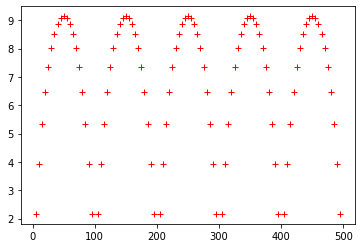

In [9]:
# Question 6 : 

# Tout d'abord pour calculer la matrice de covariance conditionnelle, on la calcule en utilisant son expression obtenue
#en question 2 :

Mat_cov_cond = cov_inconnu_inconnu - (cov_obs_inconnu.dot(np.linalg.inv(cov_obs_obs))).dot(np.transpose(cov_obs_inconnu))

# Ensuite on trace sa diagonale en fonction de la position : 

diag = np.array([Mat_cov_cond[i,i] for i in range (len(Mat_cov_cond))])
plt.plot(np.array(unknown_indexes) * Delta, diag, "+", color = 'red')
plt.show()

La diagonale de la matrice de covariance correspond aux variances des différentes variables aléatoires.

Plus on est loin d'un point dont la profondeur est connue plus la variance augmente : en effet en s'éloignant on accumule les possibilités de variations de profondeur potentielles. La variance est maximale lorsqu'on se situe exactement au milieu de 2 points de profondeurs connues, c'est à dire au point le plus éloigné possible d'un point dont on connaît la profondeur.

On remarque la cohérence d'avoir choisi C comme fonction qui est croissante en la distance entre deux points.

In [10]:
# Question 7 : 

# Tout d'abord nous simulons N - n variables suivant une loi centrée réduite, à l'aide de la méthode de Box-Muller

def Box_Muller():
    U = np.random.uniform()
    V = np.random.uniform()
    return np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)

def Vect_G () : 
    G = np.zeros(len(unknown_indexes))
    for i in range(len(G)):
        G[i] = Box_Muller()
    return G

In [11]:
# Ensuite on effectue la factorisation de Cholesky de la matrice de covariance conditionnelle :

R = np.linalg.cholesky(Mat_cov_cond)

In [12]:
# On calcule Y = m + RW
# Ensuite on crée le vecteur des profondeurs complet, comportant à la fois les profondeurs connues et simulées, 
# qu'on rajoute au vecteur final séparément : 

def simuler():
    simul_cond = E_conditionnelle + R.dot(Vect_G())
    simul_finale = np.zeros(N)
    c1, c2 = 0, 0
    for i in range(N):
        if i in observation_indexes:
            simul_finale[i] = depth[c1]
            c1+=1
        else : 
            simul_finale[i] = simul_cond[c2]
            c2+=1
    return simul_finale

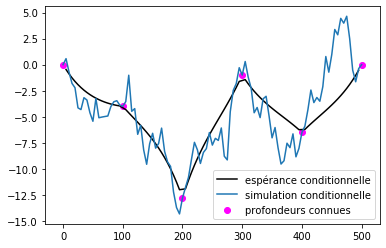

In [13]:
# Et on affiche le tout : 

plt.plot([k * Delta for k in unknown_indexes], E_conditionnelle, color = 'black', label = 'espérance conditionnelle')
plt.scatter([k * Delta for k in observation_indexes], depth, color = 'magenta', label = 'profondeurs connues')
plt.plot(discretization, simuler(), label ='simulation conditionnelle')
plt.legend()

In [43]:
# Question 8 : 

def long_cable(profondeurs, delta):
    l = 0 
    for k in range(len(profondeurs) - 1):
        l+= np.sqrt(delta**2 + (profondeurs[k+1] - profondeurs[k])**2)
    return l



In [42]:
# Question 9 :

# On met de côté cette fonction qui sera utile :
def nsimuls(n):
    L= []
    for k in range(n):
        unesimul = simuler()
        L.append(long_cable(unesimul,Delta))
    return L

# Tout d'abord on implémente une fonction qui renvoie la longueur moyenne de câble pour n simulations :

def long_cable_simul(n):
    c = 0 
    for k in range(n):
        unesimul = simuler()
        c += long_cable(unesimul, Delta)
    return c/n

# Comme on l'avait fait précédemment dans la fonction "simuler", on crée un vecteur des profondeurs qui regroupe à la fois
# les profondeurs connues et celles simulées par l'espérance conditionnelle

def profondeurs_conditionnelles():
    vect_prof = np.zeros(N)       
    c1, c2 = 0, 0
    for i in range(N):
        if i in observation_indexes:
            vect_prof[i] = depth[c1]
            c1+=1
        else:
            vect_prof[i] = E_conditionnelle[c2]
            c2+=1
    return vect_prof

L1 = long_cable_simul(100)
L2 = long_cable(profondeurs_conditionnelles(), Delta)

In [16]:
print(f"L'espérance conditionnelle estimée de la longueur est égale à {L1} mètres.")
print(f"La longueur de l'espérance conditionnelle estimée est égale à {L2} mètres.")

L'espérance conditionnelle estimée de la longueur est égale à 522.3393449110405 mètres.
La longueur de l'espérance conditionnelle estimée est égale à 501.6468416918411 mètres.


On remarque que l'espérance conditionnelle estimée de la longueur est supérieure à la longueur de l'espérance conditionnelle estimée : en effet l'espérance conditionnelle estimée lisse les aspérités des fonds marins, minimisant ainsi la longueur de câble à installer.

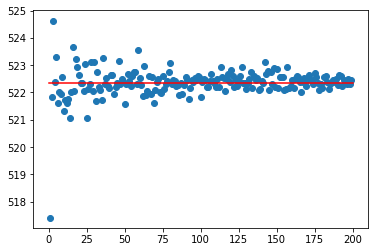

In [33]:
# Question 10 : 

# On réutilise la fonction codée en question précédente : 

X = [k for k in range(1,200)]

Y = [long_cable_simul(k) for k in range(1,200)]

plt.scatter(X,Y)
plt.plot([0,200],[L1,L1], color ='red')

On observe en effet une convergence des Mn vers l'espérance conditionnelle estimée de la longueur (en rouge), en cohérence avec la loi faible des grands nombres.

On pourrait se permettre de prendre n beaucoup plus grand si on se cantonne à une seule simulaton d'un ensemble de longueurs dont on moyenne les termes petit à petit.

<BarContainer object of 15 artists>

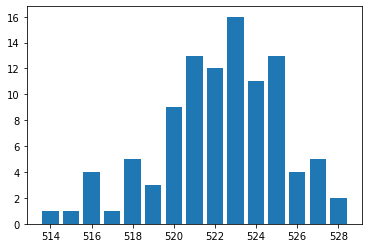

In [71]:
# Question 11 : 

def hist(X):
    X_floored = np.round(X,0)
    valeurs = []
    occus = []
    for x in X_floored :
        if x not in valeurs :
            valeurs.append(x)
            occus.append(1)
        else :
            index = valeurs.index(x)
            occus[index]+=1
    return (np.array(valeurs),occus)

n = 100 

histo1 = nsimuls(100)

plt.bar(hist(histo1)[0],hist(histo1)[1])

In [ ]:
# Question 12 :

### Méthode 1 :

In [108]:
conf_int_1 = stats.norm.interval(0.95, loc = np.mean(histo1), scale = np.std(histo1))
print(f"L'intervalle de confiance à 95% est : {conf_int_1}")

Première méthode : (516.4409808467885, 528.1150556898274)


### Question 13 : 

Pour calculer la probabilité que la longueur du câble dépasse 525 mètres, on va approcher cette probabilité par le nombre de cas dans lesquels le câble fait plus de 525 sur le nombre de simulations effectuées.

In [92]:
def prob_depass(leslongs):
    c = 0
    for l in leslongs:
        if l > 525:
            c+=1
    print(f'La probabilité approximée sur {n} simulations que la longueur de câble dépasse 525 mètres vaut approximativement {c/len(leslongs)}')

def long_cable_simul(n):
    c = 0 
    for k in range(n):
        unesimul = simuler()
        c += long_cable(unesimul, Delta)
        
A = prob_depass(nsimuls(100))

La probabilité approximées sur 100 simulations que la longueur de câble dépasse 525 mètres vaut approximativement 0.22


In [ ]:
# Question 14 :

In [98]:
#Pour gagner du temps de calcul ensuite, on code une version simplifée de calcul des Mn : 
    
def Mn_simple(simuls):
    X = [k for k in range(1,len(simuls))]
    Y = []
    for k in range(1,len(simuls)):
        c = 0
        for j in range(k):
            c += simuls[j]
        Y.append(c/k)
    plt.scatter(X,Y)

#### Pour 1000 simulations :

La probabilité approximées sur 100 simulations que la longueur de câble dépasse 525 mètres vaut approximativement 0.183


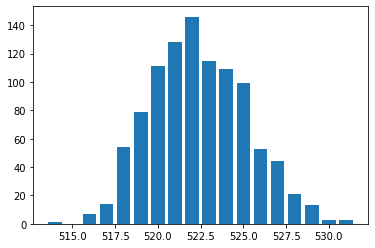

In [101]:
histo2 = nsimuls(1000)

plt.bar(hist(histo2)[0],hist(histo2)[1])

prob_depass(histo2)

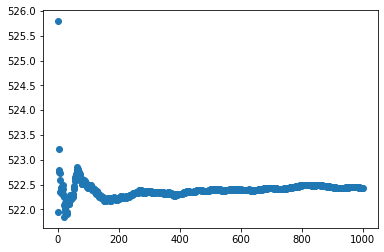

In [102]:
Mn_simple(histo2)

In [ ]:
### Pour 10 000 simulations :

La probabilité approximées sur 100 simulations que la longueur de câble dépasse 525 mètres vaut approximativement 0.1875


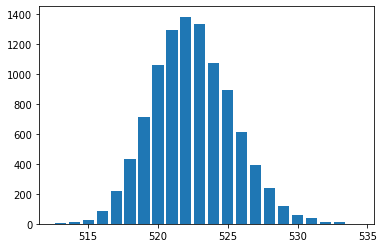

In [94]:
histo3 = nsimuls(10000)

plt.bar(hist(histo3)[0],hist(histo3)[1])

prob_depass(histo3)

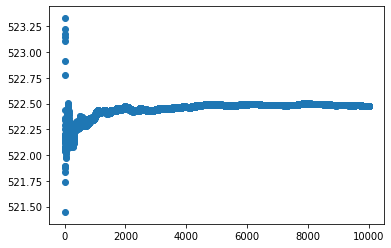

In [103]:
Mn_simple(histo3)

In [95]:
histo4 = nsimuls(100000)

plt.bar(hist(histo4)[0],hist(histo4)[1])

prob_depass(histo4)

KeyboardInterrupt: 

In [ ]:
Mn_simple(histo4)

Plus le nombre de simulations augmente, meilleure est la convergence de Mn vers l'espérance conditionnelle estimée de la longueur et plus l'histogramme des longueurs ressemble à celui d'une variable aléatoire suivant une loi gaussienne.